# Diffusion of temperature changes in the subsurface
Changes of the surface temperature are a natural observation. They happen on a daily (day-night cycle) or annual (seasons). Also on longer timescales, there are cycles which change the surface temperature. 

The longer such a temperature signal lasts, the deeper it still can be observed. In the following, we will see how to qualitatively ass ess the depths to which a periodic temperature change propagates, and create an iso-plot between temperature deviation and depth for signals of different lengths (day to millenium).

Then we will look at a "boxcar" signal, which is a simplification of an instantanious temperature change $\Delta T_s$ at the surface, which persists for a certain time $\tau$.

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf, erfc

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
import h5netcdf as nc

import matplotlib.pyplot as plt
%matplotlib inline

## Transient temperature diffusion

Depths to which the temperature change propagates ("skin depth")  

$$T(z,t) = T_1 + \Delta T * erfc(z/(2\sqrt{kt}))$$

Temperature variation at depth:

$$ T(z,t) = T_0 * exp(-z/d_w) * cos(\omega * t - z / d_w) $$  
with $d_w = \sqrt{2*k_t/\omega}$

In [2]:
T1 = 20
dT = -20
kappa = 1e-6
hour = 3600
day = hour*24
month = day*30.5
year = month*12
millenium = year*1000

times = np.array([hour, day, month, year, millenium])

z = np.logspace(-3,3,100)

In [3]:
# Depth calculation
the_keys = ['Stunde', 'Tag', 'Monat', 'Jahr', 'Jahrtausend']
Tdepth = {}
for t in range(len(times)):
    Tdepth_temp = T1 + dT*erfc(z/(2*np.sqrt(kappa*times[t])))
    key = the_keys[t]
    Tdepth[key] = Tdepth_temp

In [4]:
time_depths = pd.DataFrame.from_dict(Tdepth)

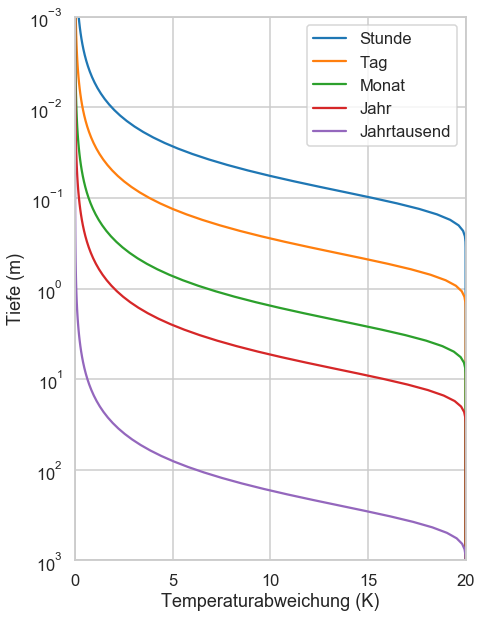

In [5]:
fig = plt.figure(figsize=[7,10])

for i in the_keys:
    plt.semilogy(time_depths[i], z, label=i)

plt.legend(loc='best')
plt.xlim([0,20])
plt.ylim([1e-3,1e3])
plt.xlabel('Temperaturabweichung (K)')
plt.ylabel('Tiefe (m)')

plt.gca().invert_yaxis()
#plt.savefig('temp_abweichung.svg', bbox_inches='tight')

## Boxcar test

Let's assume, 20000 years ago, temperature dropped by of 10 K for a duration of of 10000 years, until temperatures rose again by 10 K. This can be simulated with the boxcar signal. In this specific case, we can use the superposition of two signals of equal amplitude here:

$$\frac{\Delta T(z)_{t=0}}{\Delta T_S} = erfc\bigg(\frac{z}{\sqrt{4 k t_2}}\bigg) - erfc\bigg(\frac{z}{\sqrt{4 k t_1}}\bigg) $$
Also, we assume a thermal diffusivity of $\kappa = 1e^{-6}$.
<img src="imgs/boxcar_signal.png" width="400">

In [6]:
y2s = 3600*24*365.25
DT = 10
t1 = 29000 * y2s
t2 = 19000 * y2s
z = np.linspace(1,5000,1000)

In [7]:
DTZ_Boxcar = DT * (erfc(z/np.sqrt(4*kappa*t2)) - erfc(z/np.sqrt(4*kappa*t1)))

Text(0,0.5,'Tiefe (m)')

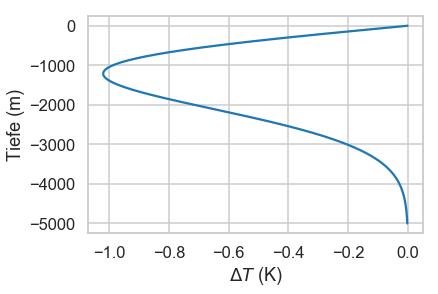

In [8]:
plt.plot(DTZ_Boxcar,-z)
plt.xlabel('$\Delta T$ (K)')
plt.ylabel('Tiefe (m)')

Now let's just calculate a very simple, linear temperature gradient (not considering radiogenic heat for example), and see, if we can spot a difference between the temperature profile, uncorrected and corrected for the ice-age signal.

In [9]:
# gradient
Ts = 11
Geotherm = 0.026 * z + Ts

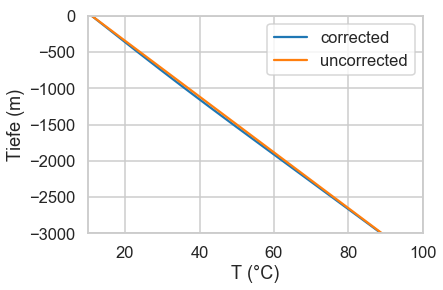

In [10]:
plt.plot(Geotherm + DTZ_Boxcar,-z, label='corrected')
plt.plot(Geotherm,-z, label='uncorrected')
plt.xlabel('T (°C)')
plt.ylabel('Tiefe (m)')
plt.ylim([-3000,0])
plt.xlim([10,100])
plt.legend()